# Neutrino Parameter Estimation from Oscillation Probability Maps

## Generate random inputs: Maps after Matter Effect

We use a simulator that generates 9 oscillation probability maps:

| Transition ↓ / Source → | $\nu_e$ (source) | $\nu_\mu$ (source) | $\nu_\tau$ (source) |
|--------------------------|------------------|--------------------|---------------------|
| **$\nu_e$ (detected)**  | $P(\nu_e \leftarrow \nu_e)$ | $P(\nu_e \leftarrow \nu_\mu)$ | $P(\nu_e \leftarrow \nu_\tau)$ |
| **$\nu_\mu$ (detected)** | $P(\nu_\mu \leftarrow \nu_e)$ | $P(\nu_\mu \leftarrow \nu_\mu)$ | $P(\nu_\mu \leftarrow \nu_\tau)$ |
| **$\nu_\tau$ (detected)** | $P(\nu_\tau \leftarrow \nu_e)$ | $P(\nu_\tau \leftarrow \nu_\mu)$ | $P(\nu_\tau \leftarrow \nu_\tau)$ |


In [ ]:
# Install NuOscParam library
!pip install -q git+https://github.com/GiorgioMorales/NuOscParam

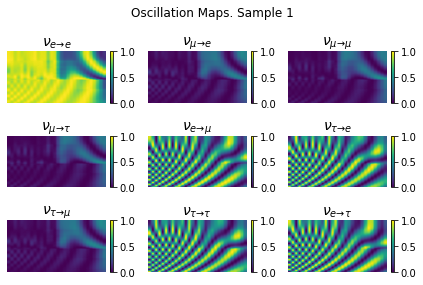

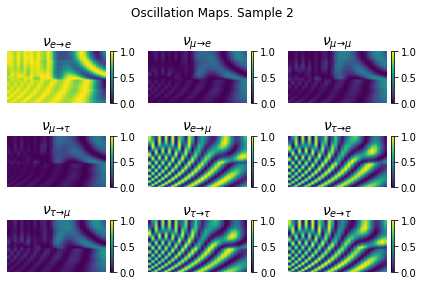

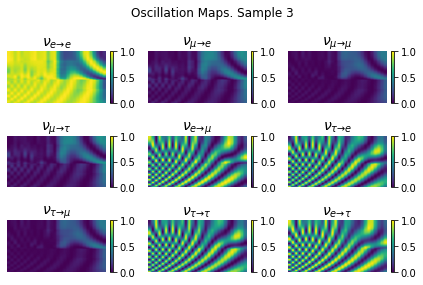

In [1]:
from NuOscParam.utils import *
from NuOscParam.Data.DataRanges import *
from NuOscParam.Data.OscIterableDataset import OscIterableDataset
%matplotlib inline

# Configure generator
generator = iter(OscIterableDataset(ranges=NEUTRINO_RANGES, pred_param="ALL", return_params=True, mode='earth',
                                    device=torch.device("cuda" if torch.cuda.is_available() else "cpu")))
# Generate three random maps
X_test, Osc_params = [], []
n_samples = 3
for i in range(n_samples):
    xtest, _, osc_pars, _ = next(generator)  # Generate 1 sample
    X_test.append(xtest)
    Osc_params.append(osc_pars)
    # Plot oscillation maps
    input_image = xtest[0, :, :, :].permute(1, 2, 0)
    plot_osc_maps(input_image, title=f"Oscillation Maps. Sample {i+1}")
X_test = torch.cat(X_test, dim=0)

## Point Prediction Demonstration

This is a demonstration where only point predictions are provided (without uncertainty quantification)

In [2]:
from NuOscParam.OscillationEstimator import OscillationEstimator
# Configure predictor
predictor = OscillationEstimator()
# Predict osc. parameters
pred_OscParams = predictor.predict(X_test, denormalize=True)

Processing Time: 36.480292320251465 s...                                        


In [3]:
import pandas as pd
param_names = [r"$\theta_{12}$", r"$\theta_{23}$", r"$\theta_{13}$", r"$\delta_{CP}$", r"$\Delta m^2_{21}$", r"$\Delta m^2_{31}$"]
for i in range(n_samples):
    print("*" * 80)
    print(f"Results: Sample {i + 1}")
    print("*" * 80)
    df = pd.DataFrame({"Original": Osc_params[i].cpu().numpy().flatten(),
                       "Predicted": pred_OscParams[i, :].flatten()}, index=param_names)
    display(df)

********************************************************************************
Results: Sample 1
********************************************************************************


,Original,Predicted
$\theta_{12}$,34.230694,34.222607
$\theta_{23}$,44.456497,44.424839
$\theta_{13}$,8.155071,8.138843
$\delta_{CP}$,265.347778,265.008972
$\Delta m^2_{21}$,0.000075,0.000075
$\Delta m^2_{31}$,0.002539,0.002541


********************************************************************************
Results: Sample 2
********************************************************************************


,Original,Predicted
$\theta_{12}$,33.204876,33.090401
$\theta_{23}$,43.023533,42.970692
$\theta_{13}$,8.460744,8.449588
$\delta_{CP}$,308.136444,308.760254
$\Delta m^2_{21}$,0.000073,0.000074
$\Delta m^2_{31}$,0.002340,0.002340


********************************************************************************
Results: Sample 3
********************************************************************************


,Original,Predicted
$\theta_{12}$,32.709072,32.675655
$\theta_{23}$,48.516846,48.532795
$\theta_{13}$,8.394295,8.385445
$\delta_{CP}$,174.152206,174.812653
$\Delta m^2_{21}$,0.000079,0.000079
$\Delta m^2_{31}$,0.002543,0.002544


## Uncertainty Quantification Demonstration

This is a demonstration where, in addition to the point predictions, prediction intervals are produced for each prediction

In [4]:
pred_OscParams = predictor.predict(X_test, denormalize=True, uncertainty=True)

Processing Time: 33.7981173992157 s31...                                        


In [5]:
for i in range(n_samples):
    print("*" * 80)
    print(f"Results: Sample {i + 1}")
    print("*" * 80)
    df = pd.DataFrame({"Original": Osc_params[i].cpu().numpy().flatten(),
                       "Lower Bound": pred_OscParams[1][i, 1].flatten(),
                       "Predicted": pred_OscParams[0][i, :].flatten(),
                       "Upper Bound": pred_OscParams[1][i, 0].flatten()}, index=param_names)
    display(df)

********************************************************************************
Results: Sample 1
********************************************************************************


,Original,Lower Bound,Predicted,Upper Bound
$\theta_{12}$,34.230694,34.225043,34.225043,34.288005
$\theta_{23}$,44.456497,44.425179,44.425179,44.460732
$\theta_{13}$,8.155071,8.139401,8.139401,8.154340
$\delta_{CP}$,265.347778,265.024673,265.024673,265.871371
$\Delta m^2_{21}$,0.000075,0.000075,0.000075,0.000075
$\Delta m^2_{31}$,0.002539,0.002539,0.002541,0.002541


********************************************************************************
Results: Sample 2
********************************************************************************


,Original,Lower Bound,Predicted,Upper Bound
$\theta_{12}$,33.204876,33.095072,33.095072,33.215693
$\theta_{23}$,43.023533,42.971307,42.971307,43.035762
$\theta_{13}$,8.460744,8.450019,8.450019,8.461562
$\delta_{CP}$,308.136444,307.586002,308.738877,308.738877
$\Delta m^2_{21}$,0.000073,0.000073,0.000074,0.000074
$\Delta m^2_{31}$,0.002340,0.002340,0.002340,0.002341


********************************************************************************
Results: Sample 3
********************************************************************************


,Original,Lower Bound,Predicted,Upper Bound
$\theta_{12}$,32.709072,32.677777,32.677777,32.732526
$\theta_{23}$,48.516846,48.503814,48.532522,48.532522
$\theta_{13}$,8.394295,8.385739,8.385739,8.393618
$\delta_{CP}$,174.152206,173.386340,174.786670,174.786670
$\Delta m^2_{21}$,0.000079,0.000079,0.000079,0.000079
$\Delta m^2_{31}$,0.002543,0.002543,0.002544,0.002544
